In [254]:
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["font.family"] = 'AppleGothic'  # 사용할 한글 폰트 설정

- 온라인, 오프라인 카드 사용 내역 데이터를 확인
    1. csv폴더 안에 있는 오프라인.csv, 온라인.csv 로드
    2. 두개의 데이터프레임을 단순한 행결합(유니언 결합)
        - 두개의 데이터프레임의 구조를 파악
        - 두개의 데이터프레임의 구조를 같은 형태로 변환
        - 유니언 결합
    3. 기준년월 컬럼의 데이터를 시계열데이터로 변경
    4. 기준년월, 업종별 총이용금액의 합계를 그래프 표시

In [255]:
# 1. csv폴더 안에 있는 오프라인.csv, 온라인.csv 로드
off = pd.read_csv('../csv/card/오프라인.csv', encoding = 'cp949')
online = pd.read_csv('../csv/card/온라인.csv', encoding = 'cp949')

In [256]:
# 두개의 데이터프레임의 구조를 파악
print(off.head())
print(online.head())

     crym tco_btc_nm  ma_fem_dc  agegrp_dc  tco_btc_u_ct       tco_btc_u_am
0  201901        백화점          1          1             1        7600.000000
1  201901        백화점          1         10           379    19458720.000000
2  201901        백화점          1         20         45173  4747711001.000000
3  201901        백화점          1         30        271858 27918261543.000000
4  201901        백화점          1         40        391109 37911486656.000000
     crym  ma_fem_dc  agegrp_dc  tco_btc_u_ct  tco_btc_u_am
0  201901          1          1             1        110685
1  201901          1         10          2333      98108225
2  201901          1         20        272915   13854081656
3  201901          1         30       1320227   82946127640
4  201901          1         40       1372052   95550848337


In [257]:
off['tco_btc_nm'].unique()

array(['백화점', '할인점', '슈퍼마켓', '편의점'], dtype=object)

In [258]:
# 두개의 데이터프레임의 구조를 같은 형태로 변환
online['tco_btc_nm'] = '온라인'
online.head()

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am,tco_btc_nm
0,201901,1,1,1,110685,온라인
1,201901,1,10,2333,98108225,온라인
2,201901,1,20,272915,13854081656,온라인
3,201901,1,30,1320227,82946127640,온라인
4,201901,1,40,1372052,95550848337,온라인


In [259]:
off.columns = ['기준년월','업종','성별','연령대','총이용건수','총이용금액']
online.columns = ['기준년월','성별','연령대','총이용건수','총이용금액','업종'] 

In [260]:
# 유니언 결합
onoff = pd.concat([off, online], axis= 0)
onoff

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600.000000
1,201901,백화점,1,10,379,19458720.000000
2,201901,백화점,1,20,45173,4747711001.000000
3,201901,백화점,1,30,271858,27918261543.000000
4,201901,백화점,1,40,391109,37911486656.000000
...,...,...,...,...,...,...
646,202109,온라인,2,50,3237324,181360535814.000000
647,202109,온라인,2,60,1019719,70026626874.000000
648,202109,온라인,2,70,159261,13091029631.000000
649,202109,온라인,2,80,20094,1935122483.000000


In [261]:
onoff.reset_index(drop = True, inplace = True)

In [262]:
## pandas에서 지수표현식 없애기
pd.options.display.float_format = '{:2f}'.format

In [263]:
# 3. 기준년월 컬럼의 데이터를 시계열데이터로 변경
onoff['기준년월'] = pd.to_datetime(onoff['기준년월'],format ='%Y%m')
onoff.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7600.000000
1,2019-01-01,백화점,1,10,379,19458720.000000
2,2019-01-01,백화점,1,20,45173,4747711001.000000
3,2019-01-01,백화점,1,30,271858,27918261543.000000
4,2019-01-01,백화점,1,40,391109,37911486656.000000


In [264]:
# 성별 컬럼의 데이터를 1은 남자 2는 여자 변경
# case1
# replace()

# onoff['성별'] = onoff['성별'].replace({1:'남자',2:'여자',9:'무관'})

In [265]:
# case 2
# map() + (일반함수 | lambda 함수)
# def change(x):
#     # x에 입력되는 데이터들을 1,2,9,-
#     if x == 1:
#         return '남자'
#     elif x == 2:
#         return '여자'
#     else:
#         return '무관'
# onoff['성별'].map(change)

In [266]:
# case 3
# map() + if 구문 한줄로 표시 :if(조건식) else "거짓인경우 데이터"
# onoff['성별'] = onoff['성별'].map(
#     lambda x: "여자" if (x==2) else ("남자" if(x==1) else "무관")
# )

In [267]:
# case4
# for문 이용
for i in range(len(onoff)):
    if onoff['성별'][i] == 1:
        onoff['성별'][i] ='남자'
    else:
        onoff['성별'][i] ='여자'

In [268]:
onoff['성별'].value_counts()

여자    1661
남자    1638
Name: 성별, dtype: int64

In [269]:
onoff

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,남자,1,1,7600.000000
1,2019-01-01,백화점,남자,10,379,19458720.000000
2,2019-01-01,백화점,남자,20,45173,4747711001.000000
3,2019-01-01,백화점,남자,30,271858,27918261543.000000
4,2019-01-01,백화점,남자,40,391109,37911486656.000000
...,...,...,...,...,...,...
3294,2021-09-01,온라인,여자,50,3237324,181360535814.000000
3295,2021-09-01,온라인,여자,60,1019719,70026626874.000000
3296,2021-09-01,온라인,여자,70,159261,13091029631.000000
3297,2021-09-01,온라인,여자,80,20094,1935122483.000000


In [270]:
# 4. 기준년월, 업종별 총이용금액의 합계를 그래프 표시
group_data = onoff[['기준년월','업종','총이용금액']]\
    .groupby(['기준년월','업종']).sum()

In [271]:
group_data

총이용금액
기준년월       업종                       
2019-01-01 백화점   455895539087.000000
           슈퍼마켓  173613089088.000000
           온라인   778281658966.000000
           편의점    44083584621.000000
           할인점   198171780041.000000
...                              ...
2021-09-01 백화점   422081236462.000000
           슈퍼마켓  181809468875.000000
           온라인  1195275255905.000000
           편의점    61362822910.000000
           할인점   151079584433.000000

[165 rows x 1 columns]

In [369]:
group_data.index.get_level_values('업종').unique()

Index(['백화점', '슈퍼마켓', '온라인', '편의점', '할인점'], dtype='object', name='업종')

In [373]:
gg.head(1)

총이용금액                                          \
업종                         백화점                슈퍼마켓                 온라인   
기준년월                                                                     
2019-01-01 455895539087.000000 173613089088.000000 778281658966.000000   

                                                   
업종                        편의점                 할인점  
기준년월                                               
2019-01-01 44083584621.000000 198171780041.000000

In [371]:
gg = group_data.unstack().copy()
gg.index = gg.index.strftime('%Y-%m-%d')
for i in range(len(gg)):
    print(i)
    # for j in group_data.index.get_level_values('업종').unique():
    #     plt.annotate(
    #         font_size = 20,
    #         text = f'업종 : {j}, 총이용금액 : {gg} '
    #     )
    #     #gg.index[i] # 그래프 x 좌표
    #     #gg.loc[gg.index[i],]
    #     print(j) # 




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


<AxesSubplot:xlabel='기준년월', ylabel='총이용금액'>

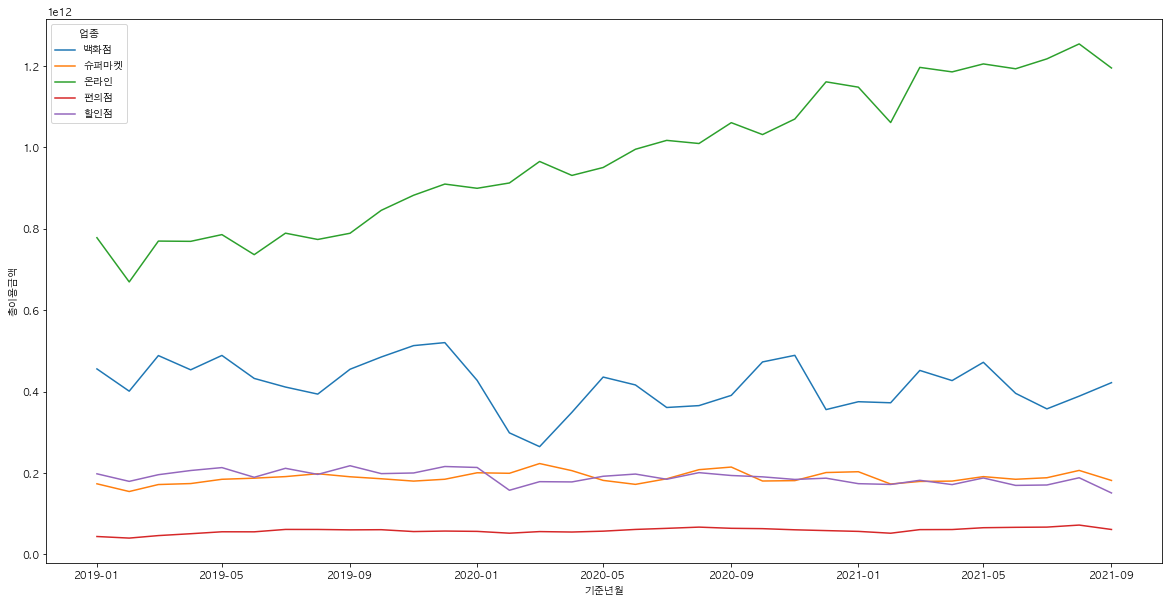

In [365]:
plt.figure(figsize=(20,10))
sns.lineplot(data = group_data, x = '기준년월', y = '총이용금액', hue = '업종')
# for j in group_data.index.get_level_values('기준년월').unique())):
#     for i in range(len(group_data.index.get_level_values('업종').unique())):
#         plt.annotate(
#             fontsize = 20,
#             text = f'업종: {group_data.index.get_level_values('업종').unique()[i]},총 이용금액:{group_data}'
#         )


<AxesSubplot:xlabel='기준년월,업종'>

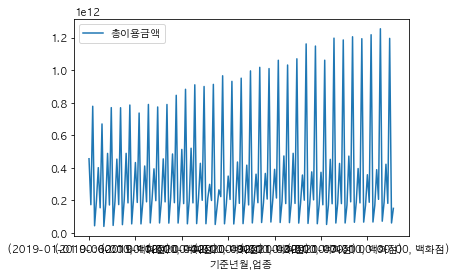

In [ ]:
group_data.plot()

<AxesSubplot:xlabel='기준년월'>

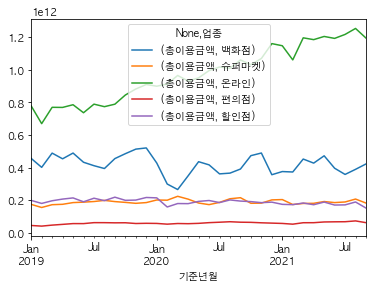

In [ ]:
group_data.unstack().plot(kind='line')

In [274]:
group_data2 = group_data.unstack().copy()

In [ ]:
## 기준년월 별 합산 데이터를 확인
group_data3 = group_data2.unstack()

In [ ]:
group_data3['All'].sum(axis=1)

In [ ]:
group_data3.plot()

In [291]:
pivot_data = onoff.pivot_table(
    index = '기준년월',
    columns = '업종',
    values = '총이용금액',
    aggfunc='sum',
    margins= True
)

<AxesSubplot:xlabel='기준년월'>

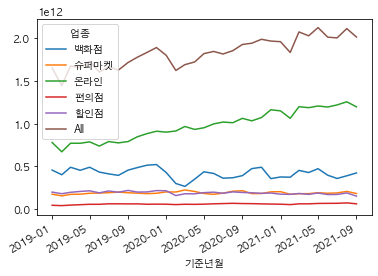

In [303]:
pivot_data.drop(index = 'All', axis= 0).plot()

<AxesSubplot:xlabel='기준년월'>

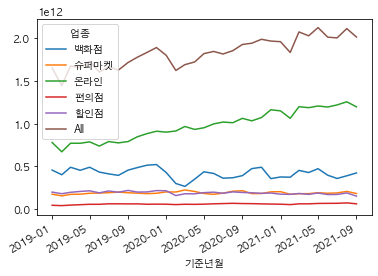

In [316]:
pivot_data.iloc[:-1].plot()

In [317]:
pivot_data.head(3)

업종,백화점,슈퍼마켓,온라인,편의점,할인점,All
기준년월,,,,,,
2019-01-01 00:00:00,455895539087.000000,173613089088.000000,778281658966.000000,44083584621.000000,198171780041.000000,1650045651803.000000
2019-02-01 00:00:00,401191621441.000000,154639049561.000000,669627559900.000000,40196820908.000000,179570386603.000000,1445225438413.000000
2019-03-01 00:00:00,488652119604.000000,171793017241.000000,769982635445.000000,46346861161.000000,195968338413.000000,1672742971864.000000


In [318]:
pivot_data['오프라인'] = pivot_data['All'] - pivot_data['온라인']

In [320]:
pivot_data.head(1)

업종,백화점,슈퍼마켓,온라인,편의점,할인점,All,오프라인
기준년월,,,,,,,
2019-01-01 00:00:00,455895539087.000000,173613089088.000000,778281658966.000000,44083584621.000000,198171780041.000000,1650045651803.000000,871763992837.000000


In [328]:
data = pivot_data.iloc[:-1]

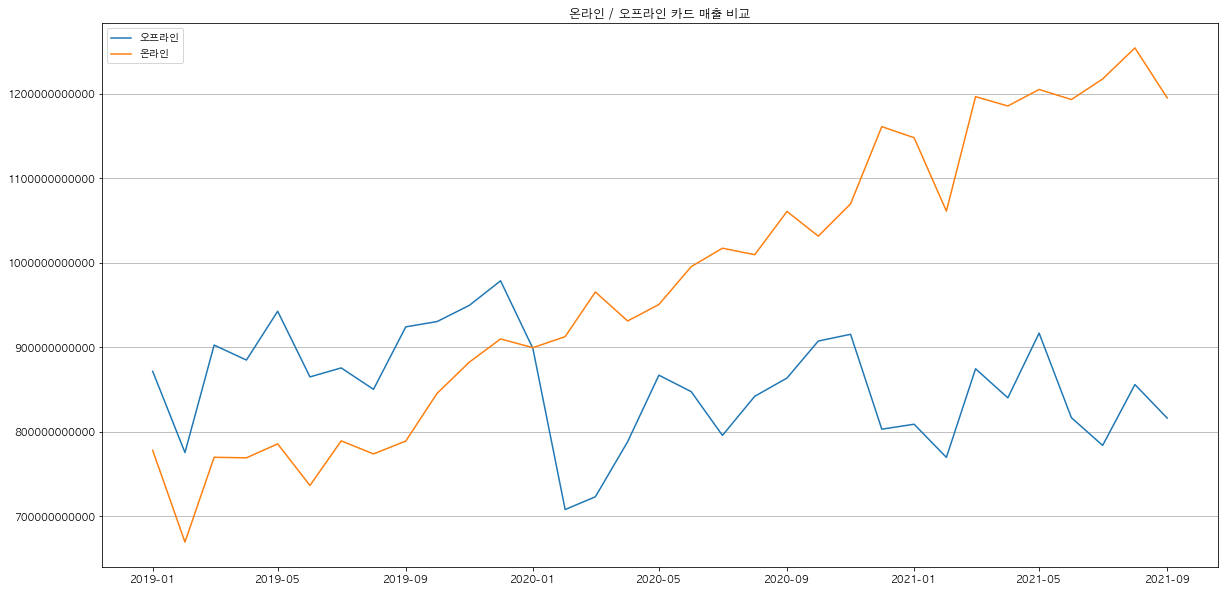

In [338]:
x = data.index
y1 = data['오프라인']
y2 = data['온라인']

# 그래프의 사이즈 변경
plt.figure(figsize=(20,10))

# 그래프에서 지수표현식 제거
plt.ticklabel_format(axis='y', style = 'plain')

# y축에 그리드 선을 추가
plt.grid(True, axis='y')

plt.plot(x,y1,label = '오프라인')
plt.plot(x, y2, label = '온라인')

# 그래프의 제목 추가
plt.title("온라인 / 오프라인 카드 매출 비교")
# 그래프에 범례 추가
plt.legend()
plt.show()

In [ ]:
#